1.Data Cleaning and Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv("Cardiotocographic.csv")

In [4]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [6]:
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [7]:
numerical_cols_with_missing=['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']
#after finding null values replacing or filling null values with mean with those columns
for col in numerical_cols_with_missing:
    mean=data[col].mean()
    data[col].fillna(mean,inplace=True)

In [8]:
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [9]:
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [10]:
numerical_columns=data.select_dtypes(include=['float64','int64']).columns

In [11]:
numerical_columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [12]:
#finding outliers using IQR method
for col in numerical_columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
# the values which are greater than upper_bound and less than lower_bound they are treated as outliers
    outliers=data[(data[col]<lower_bound)|(data[col]>upper_bound)]
    if len(outliers):
        print(f'Outliers detected in column{col}:')
        print(outliers[[col]])

Outliers detected in columnLB:
              LB
134    52.000000
411   214.000000
610   214.000000
612   214.000000
785    52.000000
1027   51.842487
1103  214.000000
1406  214.000000
1504  214.000000
1834   52.188547
Outliers detected in columnAC:
            AC
8     0.038567
23   -0.019284
83    0.014706
85    0.014230
116   0.038567
157  -0.019284
181   0.017241
496   0.014178
497   0.015552
498   0.015258
500   0.014178
501   0.014726
526   0.015013
527   0.014065
529   0.019284
530   0.015590
531   0.016423
552   0.015782
616   0.014806
626   0.038567
630   0.017391
681  -0.019284
999   0.014024
1000  0.014907
1066  0.014303
1093  0.015642
1094  0.017668
1096  0.017341
1231  0.038567
1248  0.017857
1311  0.014320
1312  0.015113
1687  0.014400
1752 -0.019284
1857  0.014068
1858  0.015907
1859  0.017073
1860  0.015166
1861  0.014444
1862  0.016000
1866  0.014842
1918  0.038567
2060  0.038567
Outliers detected in columnFM:
            FM
12    0.072335
13    0.222390
14    0.407840


In [13]:
#considering only the values which are >= lower_bound and <= upper_bound
data=data[(data[col]>=lower_bound)&(data[col]<=upper_bound)]

In [14]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
12,131.000000,0.005076,0.072335,0.007614,0.002538,0.0,0.0,28.0,1.4,-0.702936,12.9,66.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,140.000000,0.000000,0.000000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
2118,140.000000,0.000000,0.000000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
2119,140.000000,0.000000,0.000000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0
2120,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.0


In [15]:
data.reset_index(inplace=True)

In [16]:
data

,index,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
1,2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
2,3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.0
3,4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
4,12,131.000000,0.005076,0.072335,0.007614,0.002538,0.0,0.0,28.0,1.4,-0.702936,12.9,66.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,2117,140.000000,0.000000,0.000000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
1542,2118,140.000000,0.000000,0.000000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
1543,2119,140.000000,0.000000,0.000000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0
1544,2120,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.0


In [17]:
data.drop('index',axis=1,inplace=True)

In [18]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
1,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
2,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.0
3,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
4,131.000000,0.005076,0.072335,0.007614,0.002538,0.0,0.0,28.0,1.4,-0.702936,12.9,66.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,140.000000,0.000000,0.000000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
1542,140.000000,0.000000,0.000000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
1543,140.000000,0.000000,0.000000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0
1544,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.0


2.Statistical Summary

In [19]:
statistics_summary=data.describe()
print("Summary of statistics:")
print(statistics_summary)

Summary of statistics:
                LB           AC           FM           UC           DL  \
count  1546.000000  1546.000000  1546.000000  1546.000000  1546.000000   
mean    131.919815     0.004063     0.007579     0.004829     0.001920   
std      11.115063     0.004393     0.054729     0.003313     0.003111   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     125.000000     0.000000     0.000000     0.002788     0.000000   
50%     132.000000     0.002973     0.000000     0.004881     0.000000   
75%     138.000000     0.006672     0.001987     0.006816     0.003534   
max     214.000000     0.038567     0.961268     0.030002     0.030621   

                DS           DP         ASTV         MSTV         ALTV  \
count  1546.000000  1546.000000  1546.000000  1546.000000  1546.000000   
mean     -0.000003     0.000077    42.207271     1.461245     5.455809   
std       0.000111     0.000683    17.422340     1.116480    15.659211   
min      -0.00

3.Data Visualization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

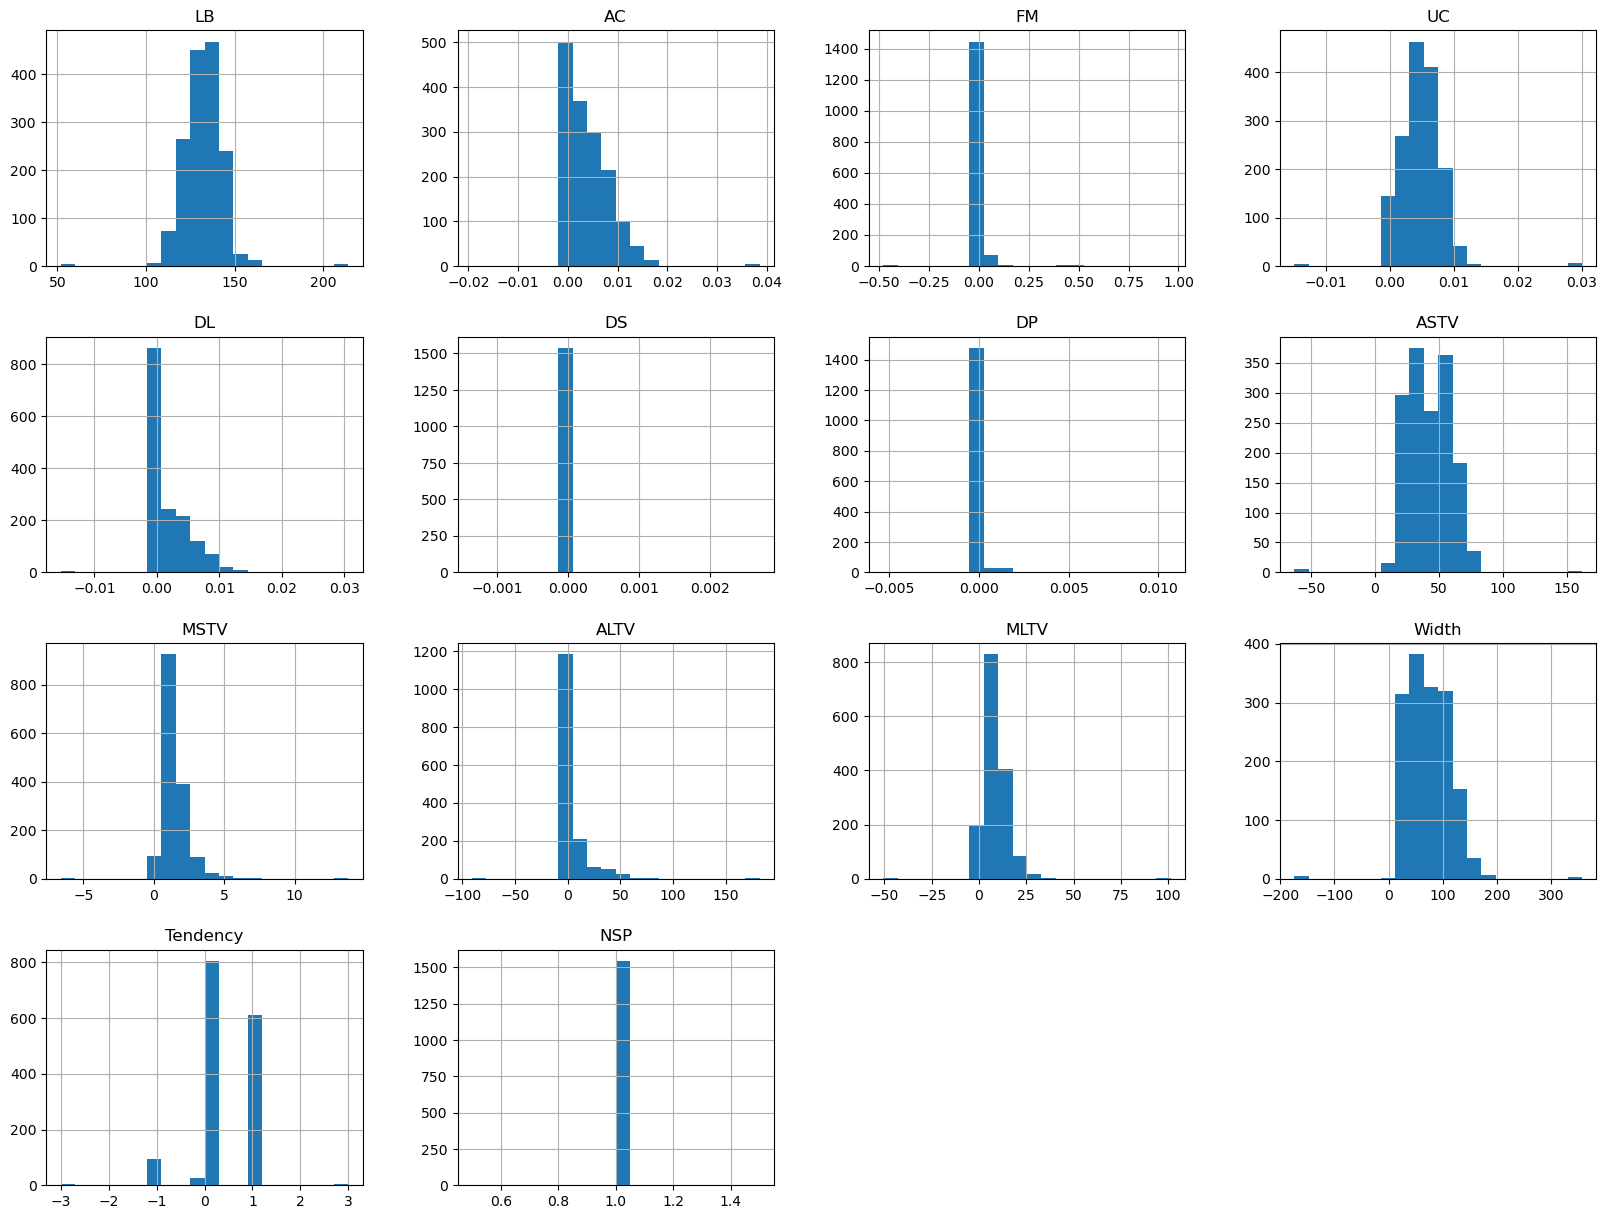

In [21]:
data.hist(bins=20,figsize=(20,15))
plt.show()

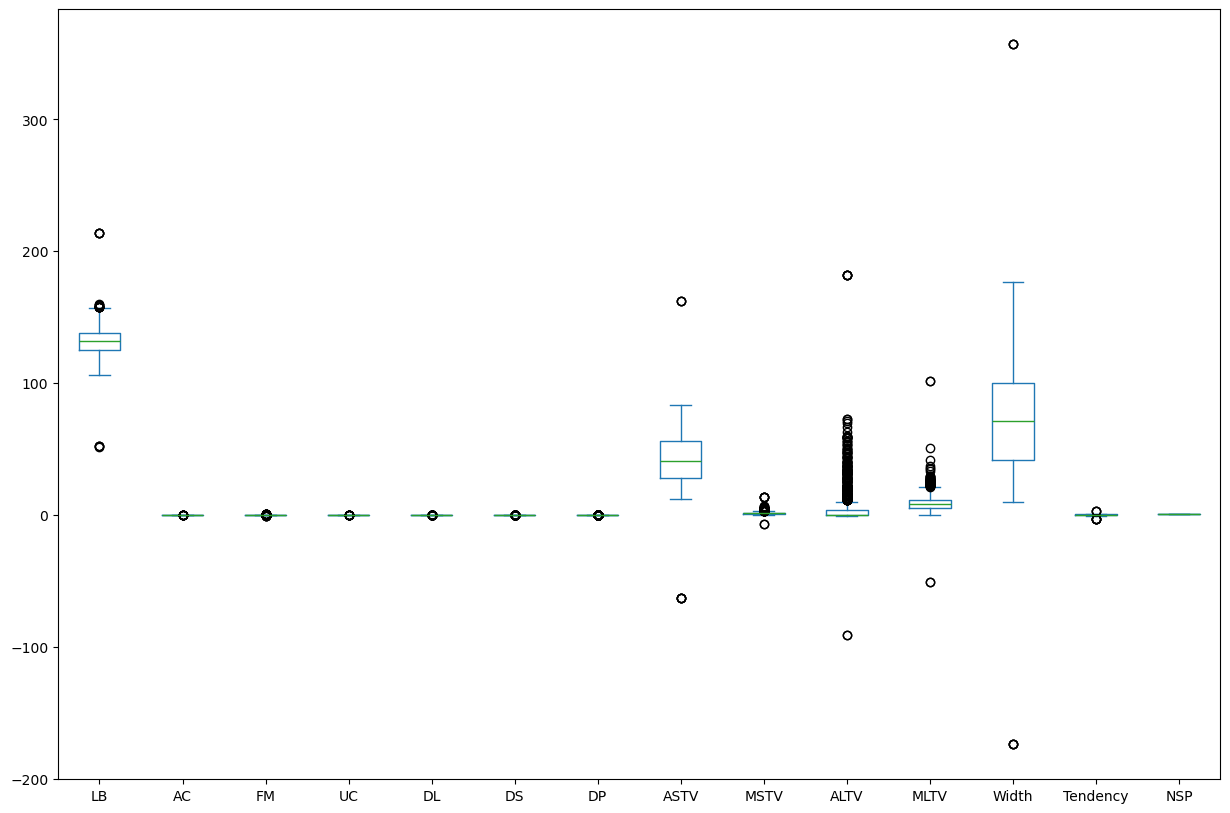

In [22]:
data.plot(kind='box',figsize=(15,10))
plt.show()

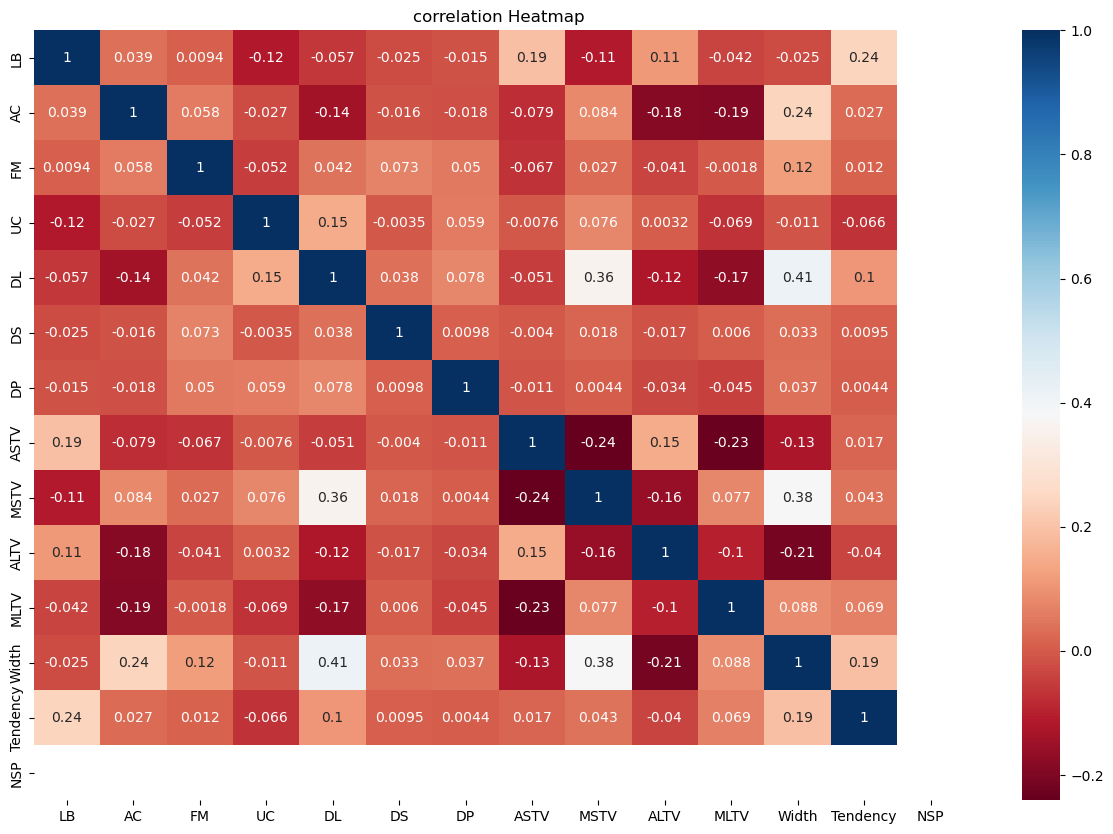

In [23]:
plt.figure(figsize=(15,10))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu')
plt.title('correlation Heatmap')
plt.show()

In [24]:
sns.pairplot(data)

4.Pattern Recognition and Insights

In [25]:
strong_correlation=correlation_matrix[(correlation_matrix>0.5) & (correlation_matrix<1)]

In [26]:
print('strong correlations:')
strong_correlation 

strong correlations:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5.Conclusion

In [27]:
print("Conclusion:")
print("In this EDA process on the given dataset, the null values are replaced with the mean values and outliers are detected using IQR method and deleted.")
print("By correlation matrix we can know the relation between the variables, corr() is used to get the correlation values it lies between -1 to +1 .")
print('Heatmap is used to visualize the relation between the variables.')

Conclusion:
In this EDA process on the given dataset, the null values are replaced with the mean values and outliers are detected using IQR method and deleted.
By correlation matrix we can know the relation between the variables, corr() is used to get the correlation values it lies between -1 to +1 .
Heatmap is used to visualize the relation between the variables.


In [28]:

print("key insights:")
print("There is no much correlation between the variables in the dataset.")
print("This finding will help in decision making and model development.")

key insights:
There is no much correlation between the variables in the dataset.
This finding will help in decision making and model development.
